<a href="https://colab.research.google.com/github/Imanebouayad/Data-augmentation-in-NLP/blob/main/imbalaced_datasets__data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imbalaced data : 

## Random over-sampling 

----

Random over-sampling is simply a process of repeating some samples of the minority class and balance the number of samples between classes in the dataset.

----

In [ ]:
import pandas as pd

In [ ]:
sent1 = "I love cats"
sent2 = "I don't like cats"
sent3 = "I adore cats"
sent4 = "I hate spiders"
sent5 = "I like dogs"
sent6 = "I like swiming"
testing_text = pd.Series([sent1, sent2, sent3, sent4, sent5, sent6])
testing_target = pd.Series([1,0,1,0,1, 1])

----

One thing is over sampler won’t be able to handle raw text data. It has to be transformed into a feature space for over sampler to work. I’ll first fit TfidfVectorizer, and oversample using Tf-Idf representation of texts.

----

In [ ]:
from imblearn.over_sampling import  RandomOverSampler
from sklearn.feature_extraction.text import  TfidfVectorizer

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
tv = TfidfVectorizer(stop_words=None, max_features=100000)
testing_tfidf = tv.fit_transform(testing_text)
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(testing_tfidf.todense(), columns=tv.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,adore,cats,dogs,don,hate,like,love,spiders,swiming
0,0.00000,0.569213,0.00000,0.000000,0.000000,0.000000,0.82219,0.000000,0.00000
1,0.00000,0.494686,0.00000,0.714542,0.000000,0.494686,0.00000,0.000000,0.00000
2,0.82219,0.569213,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
3,0.00000,0.000000,0.00000,0.000000,0.707107,0.000000,0.00000,0.707107,0.00000
4,0.00000,0.000000,0.82219,0.000000,0.000000,0.569213,0.00000,0.000000,0.00000
5,0.00000,0.000000,0.00000,0.000000,0.000000,0.569213,0.00000,0.000000,0.82219


In [ ]:
y_ROS

array([1, 0, 1, 0, 1, 1, 0, 0])

## SMOTE (Synthetic Minority Over-Sampling Technique) : 

----

SMOTE is an over-sampling approach in which the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement.

-----

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,adore,cats,dogs,don,hate,like,love,spiders,swiming
0,0.00000,0.569213,0.00000,0.000000,0.000000,0.000000,0.82219,0.000000,0.00000
1,0.00000,0.494686,0.00000,0.714542,0.000000,0.494686,0.00000,0.000000,0.00000
2,0.82219,0.569213,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
3,0.00000,0.000000,0.00000,0.000000,0.707107,0.000000,0.00000,0.707107,0.00000
4,0.00000,0.000000,0.82219,0.000000,0.000000,0.569213,0.00000,0.000000,0.00000
5,0.00000,0.000000,0.00000,0.000000,0.000000,0.569213,0.00000,0.000000,0.82219
6,0.00000,0.149572,0.00000,0.216047,0.493308,0.149572,0.00000,0.493308,0.00000
7,0.00000,0.030689,0.00000,0.044328,0.663240,0.030689,0.00000,0.663240,0.00000


----

The last entry is the data created by SMOTE. To make it easier to see, let’s see only the negative class.

----

In [ ]:
pd.DataFrame(X_SMOTE.todense()[y_SMOTE == 0], columns=tv.get_feature_names())

,adore,cats,dogs,don,hate,like,love,spiders,swiming
0,0.0,0.494686,0.0,0.714542,0.000000,0.494686,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.000000,0.707107,0.000000,0.0,0.707107,0.0
2,0.0,0.149572,0.0,0.216047,0.493308,0.149572,0.0,0.493308,0.0
3,0.0,0.030689,0.0,0.044328,0.663240,0.030689,0.0,0.663240,0.0


## Downsampling

---
If we oversample the minority class in the above oversampling, with downsampling, we try to reduce the data of majority class, so that the data classes are balanced.

---

### RandomUnderSampler


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=777)
X_RUS, y_RUS = rus.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_RUS.todense(), columns=tv.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,adore,cats,dogs,don,hate,like,love,spiders,swiming
0,0.00000,0.494686,0.0,0.714542,0.000000,0.494686,0.00000,0.000000,0.0
1,0.00000,0.000000,0.0,0.000000,0.707107,0.000000,0.00000,0.707107,0.0
2,0.00000,0.569213,0.0,0.000000,0.000000,0.000000,0.82219,0.000000,0.0
3,0.82219,0.569213,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0


### NearMiss-1

---

those points from majority class are retained whose mean distance to the k nearest points in minority class is lowest. Which means it will keep the points of majority class that’s similar to the minority class.

---

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nm = NearMiss(ratio='not minority',random_state=777, version=1, n_neighbors=1)
X_nm, y_nm = nm.fit_sample(testing_tfidf, testing_target)
pd.DataFrame(X_nm.todense(), columns=tv.get_feature_names())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,adore,cats,dogs,don,hate,like,love,spiders,swiming
0,0.00000,0.494686,0.0,0.714542,0.000000,0.494686,0.00000,0.000000,0.0
1,0.00000,0.000000,0.0,0.000000,0.707107,0.000000,0.00000,0.707107,0.0
2,0.00000,0.569213,0.0,0.000000,0.000000,0.000000,0.82219,0.000000,0.0
3,0.82219,0.569213,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0


# Text augmentation : 

---
Downloading the 2 DA libraries

---

In [ ]:
!pip install nlpaug
!pip install textaugment

     |████████████████████████████████| 389kB 5.8MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 1.0MB 8.4MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=790ff82da89f73e27bb5bea44a92146ba98a14b734e7221dd328b063a1f1a837
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=61a42b3857358e0fc5d809fbdf9a62589d64202f615f2721e81c9b60a60d8fb0
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


# Word Augmentation :


## Thesausus : 

---

This technique is for replacing words by near synonyms 

---

In [ ]:
import nltk
nltk.download('omw')
nltk.download('punkt')
nltk.download('wordnet')
from nlpaug.util import Action

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


----
----

---
WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus.

You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more.

---

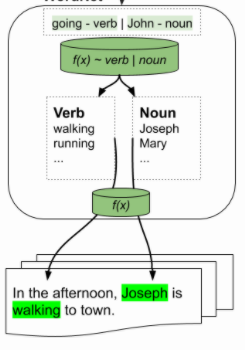

### With NLPaug :

In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
text = 'i have to go to the beach'

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet', lang='eng')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i hold to lead to the beach


----
----

### with textaugment 

In [ ]:
from textaugment import Wordnet
t = Wordnet()
augmented_text=t.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i get to pass to the beach


 ----
 v = True # enable verbs augmentation. By default is True.


 n = False # enable nouns augmentation. By default is False.


runs = 1 # number of times to augment a sentence. By default is 1.


----

In [ ]:
from textaugment import Wordnet
t = Wordnet(n=True)
augmented_text=t.augment('In the afternoon, John is riding his car to town')
print("Original:")
print('In the afternoon, John is riding his car to town')
print("Augmented Text:")
print(augmented_text)

Original:
In the afternoon, John is riding his car to town
Augmented Text:
in the afternoon, trick is riding his car to town


----
----

## Word embedings augmenter :

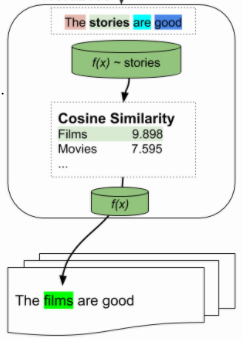

### Using nlpaug

----
Downloading the Glove model 

----

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
import zipfile
zip_ref = zipfile.ZipFile('glove.6B.zip', 'r')
zip_ref.extractall('glove6B')
zip_ref.close()

--2020-12-23 12:02:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-23 12:02:00--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-23 12:02:00--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

----
----

In [ ]:
#import gensim.downloader as api
aug = naw.WordEmbsAug(model_type='glove', model_path= '/content/glove6B/glove.6B.100d.txt')
augmented_text=aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i have to go to entire hotel


----
----

### Using textaugment with  google word2vec

----
Downloading the google news model for word embd 

----

In [ ]:
import gensim.downloader as api

model = api.load('word2vec-google-news-300')

[================================------------------] 65.4% 1088.2/1662.8MB downloadedBuffered data was truncated after reaching the output size limit.

In [ ]:
from textaugment import Word2vec
t = Word2vec(model=model)
augmented_text=t.augment('The stories are good')
print("Original:")
print('The stories are good')
print("Augmented Text:")
print(augmented_text)

Original:
The stories are good
Augmented Text:
the stories are bad


----
----

## Back Translation :

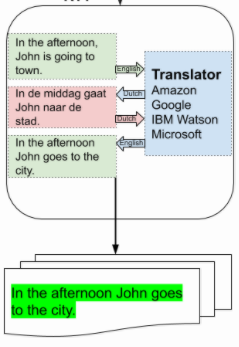

### With textaugment :

In [ ]:
from textaugment import Translate
t = Translate(src="en", to="fr")
augmented_text=t.augment('In the afternoon, John is going to town')
print("Original:")
print('In the afternoon, John is going to town')
print("Augmented Text:")
print(augmented_text)

Original:
In the afternoon, John is going to town
Augmented Text:
in the afternoon john goes to town


----
----

### With NLPaug :

----

Fairseq(-py) is a sequence modeling toolkit that allows researchers and developers to train custom models for translation, summarization, language modeling and other text generation tasks.

----

In [ ]:
pip install fairseq

     |████████████████████████████████| 1.7MB 4.3MB/s 
     |████████████████████████████████| 122kB 48.7MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 112kB 45.7MB/s 
     |████████████████████████████████| 276kB 43.9MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp36-none-any.whl size=141231 sha256=f5357450738db904d350a4cfcfd7ae1ba434298e27a272660481fdbee8a937ef
  Stored in directory: /root/.cache/pip/wheels/e3/e2/fa/b78480b448b8579ddf393bebd3f47ee23aa84c89b6a78285c8
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=484ca1ab747d4de294c66361d6218293e5cb0d15cfd209bbb4bcf2bc4a5c6a62
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built antlr4-python3-runtime PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install sacremoses


     |████████████████████████████████| 890kB 4.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=c9d5d0f5b83cb03cfad9c757bf12094998f3fe4e28cfafbdc0a02a968ec9da12
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
pip install fastBPE

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp36-cp36m-linux_x86_64.whl size=481511 sha256=ed1078f1a8c8f51387d3d43ca772e5727d242b35ba6378837161ad194319a5aa
  Stored in directory: /root/.cache/pip/wheels/f3/0c/9c/fc62058b4d473a5602bcd3d3edfece796f123875379ea82d79
Successfully built fastBPE


----
----

In [ ]:
aug = naw.BackTranslationAug()
augmented_text=aug.augment(text)


Downloading: "https://github.com/pytorch/fairseq/archive/master.zip" to /root/.cache/torch/hub/master.zip
2020-12-23 12:13:12 | INFO | fairseq.file_utils | https://dl.fbaipublicfiles.com/fairseq/models/wmt19.en-de.joined-dict.ensemble.tar.gz not found in cache, downloading to /tmp/tmpn2qu4nrz
100%|██████████| 11946275315/11946275315 [06:53<00:00, 28911716.51B/s]
2020-12-23 12:20:06 | INFO | fairseq.file_utils | copying /tmp/tmpn2qu4nrz to cache at /root/.cache/torch/pytorch_fairseq/0695ef328ddefcb8cbcfabc3196182f59c0e41e0468b10cc0db2ae9c91881fcc.bb1be17de4233e13870bd7d6065bfdb03fca0a51dd0f5d0b7edf5c188eda71f1
2020-12-23 12:23:55 | INFO | fairseq.file_utils | creating metadata file for /root/.cache/torch/pytorch_fairseq/0695ef328ddefcb8cbcfabc3196182f59c0e41e0468b10cc0db2ae9c91881fcc.bb1be17de4233e13870bd7d6065bfdb03fca0a51dd0f5d0b7edf5c188eda71f1
2020-12-23 12:23:55 | INFO | fairseq.file_utils | removing temp file /tmp/tmpn2qu4nrz
2020-12-23 12:23:55 | INFO | fairseq.file_utils | loadi

In [ ]:
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
I have to go to the beach


----
----

## Contextual Word Embeddings Augmenter 

---



In [ ]:
pip install transformers

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 2.9MB 39.2MB/s 
     |████████████████████████████████| 890kB 43.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=aac6d8e6bf4714d2efe879860a341efb2329d793b354648d4b615b200650d326
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


----
----

In [ ]:
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i have to go in city beach


----
----

#Sentence Augmentation : 

## Text generation 

----

Text generation usually involves the following steps: 

---

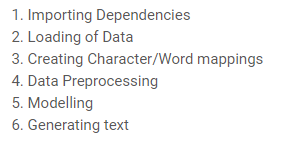

----

Downloading  "Alice in wonderland" novel to train the model

----

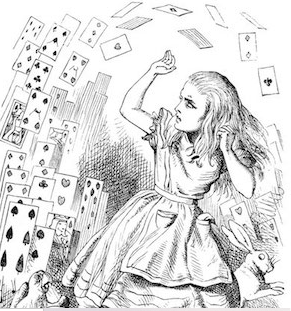

In [ ]:
!wget https://gist.githubusercontent.com/phillipj/4944029/raw/75ba2243dd5ec2875f629bf5d79f6c1e4b5a8b46/alice_in_wonderland.txt

--2020-12-17 22:50:31--  https://gist.githubusercontent.com/phillipj/4944029/raw/75ba2243dd5ec2875f629bf5d79f6c1e4b5a8b46/alice_in_wonderland.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148574 (145K) [text/plain]
Saving to: ‘alice_in_wonderland.txt’

alice_in_wonderland 100%[===================>] 145.09K  --.-KB/s    in 0.02s   

2020-12-17 22:50:32 (6.51 MB/s) - ‘alice_in_wonderland.txt’ saved [148574/148574]



----

Using LSTM model for text generation 

----

An LSTM is a neural network architecture that can memorize long-term dependencies. When we enter an input sequence (such as a string of text) into a normal forward LSTM layer, the output sequence for each timestep will encode information from that timestep as well as past timesteps. In other words, the output embedding for each word will contain contextual information from words that came before it.

----

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 
 
 
tokenizer = Tokenizer()
data = open('alice_in_wonderland.txt').read()
 
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
 
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
 
 
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
 
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
 
label = ku.to_categorical(label, num_classes=total_words)
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 100)           264700    
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 15, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1323)              133623    
_________________________________________________________________
dense_1 (Dense)              (None, 2647)              3504628   
Total params: 4,364,551
Trainable params: 4,364,551
Non-trainable params: 0
______________________________________________

----
----

----

Making the text 


----

In [ ]:
history = model.fit(predictors, label, epochs=15, verbose=1)
seed_text = "alice was not a bit hurt"
next_words = 100
   
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Epoch 1/15
784/784 [==============================] - 89s 113ms/step - loss: 4.0598 - accuracy: 0.2182
Epoch 2/15
784/784 [==============================] - 89s 113ms/step - loss: 4.0046 - accuracy: 0.2238
Epoch 3/15
784/784 [==============================] - 89s 113ms/step - loss: 3.9558 - accuracy: 0.2295
Epoch 4/15
784/784 [==============================] - 88s 112ms/step - loss: 3.9097 - accuracy: 0.2329
Epoch 5/15
784/784 [==============================] - 89s 113ms/step - loss: 3.8632 - accuracy: 0.2399
Epoch 6/15
784/784 [==============================] - 89s 113ms/step - loss: 3.8204 - accuracy: 0.2427
Epoch 7/15
784/784 [==============================] - 88s 113ms/step - loss: 3.7742 - accuracy: 0.2517
Epoch 8/15
784/784 [==============================] - 89s 113ms/step - loss: 3.7370 - accuracy: 0.2521
Epoch 9/15
784/784 [==============================] - 89s 113ms/step - loss: 3.6951 - accuracy: 0.2567
Epoch 10/15
784/784 [==============================] - 88s 112ms/step - l

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


alice was not a bit hurt and she went on what ' said alice and she had been to herself ' the mock turtle and said the march hare and the mock see the mouse ' the mouse replied ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and


----

The generated text : 

----

In [ ]:
print("Original:")
print("alice was not a bit hurt")
print("Augmented Text:")
print(seed_text)

Original:
alice was not a bit hurt
Augmented Text:
alice was not a bit hurt and she went on what ' said alice and she had been to herself ' the mock turtle and said the march hare and the mock see the mouse ' the mouse replied ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and ' the king and ' the king and ' the king ' the king and


----
----

## Contextual Word Embeddings for Sentence Augmenter

### Insert sentence by contextual word embeddings (XLNet)

In [ ]:
import nlpaug.augmenter.sentence as nas

In [ ]:
# model_path: xlnet-base-cased or gpt2
aug = nas.ContextualWordEmbsForSentenceAug(model_path='xlnet-base-cased')
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
i have to go to the beach
Augmented Texts:
['i have to go to the beach ?', 'i have to go to the beach today so you are being rude or controlling this?', 'i have to go to the beach later this evening after relaxing around these things.']


----
----

### Insert sentence by contextual word embeddings (GPT2)

In [ ]:
aug = nas.ContextualWordEmbsForSentenceAug(model_path='gpt2')
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i have to go to the beach can .


----
----

## Abstractive Summarization Augmenter

In [ ]:
article = """
The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced.
"""

aug = nas.AbstSummAug(model_path='t5-base', num_beam=3)
augmented_text = aug.augment(article)
print("Original:")
print(article)
print("Augmented Text:")
print(augmented_text)

Original:

The history of natural language processing (NLP) generally started in the 1950s, although work can be 
found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and 
Intelligence" which proposed what is now called the Turing test as a criterion of intelligence. 
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian 
sentences into English. The authors claimed that within three or five years, machine translation would
be a solved problem. However, real progress was much slower, and after the ALPAC report in 1966, 
which found that ten-year-long research had failed to fulfill the expectations, funding for machine 
translation was dramatically reduced.

Augmented Text:
the history of natural language processing (NLP) generally started in the 1950s. in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" in 1954, the Georgetown experiment involved fully automatic t

# Character Augmentation : 



## OCR Augmenter

In [ ]:
import nlpaug.augmenter.char as nac

In [ ]:
aug = nac.OcrAug()
augmented_texts = aug.augment(text, n=3)
print("Original:")
print(text)
print("Augmented Texts:")
print(augmented_texts)

Original:
i have to go to the beach
Augmented Texts:
['i have tu go to the beach', 'i have tu go to the beach', 'i have to g0 to the beach']


## Random Augmenter

Insert character randomly

In [ ]:
aug = nac.RandomCharAug(action="insert")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i xhave to go to the becach


Substitute character randomly

In [ ]:
aug = nac.RandomCharAug(action="substitute")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i Kave to go to the Zeach


Swap character randomly

In [ ]:
aug = nac.RandomCharAug(action="swap")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i hvae to go to the becah


Delete character randomly

In [ ]:
aug = nac.RandomCharAug(action="delete")
augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

Original:
i have to go to the beach
Augmented Text:
i ave to go to the bech
